In [1]:
#importing imdb data for the past decade



from requests import get
url = 'https://www.imdb.com/search/title/?title_type=feature,tv_movie,documentary&release_date=2010-01-01,2018-12-31&sort=boxoffice_gross_us,desc&count=250'
response = get(url)
print(response.text[:500])




<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">



        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle"


In [2]:
import pandas as pd
from bs4 import BeautifulSoup
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [3]:
movie_containers = html_soup.find_all('div', class_ = 'lister-item mode-advanced')
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
250


In [4]:
#parsing the data we need and putting it into a dicionary list  list 


dlist = []
for container in movie_containers:
    d ={}
    
    d['movie'] = container.find('h3', class_="lister-item-header").text
    
    d['imdb_rating'] = container.find('div',class_ = "inline-block ratings-imdb-rating").text
    try:
        d["meta_score"] = container.find('div', class_= "inline-block ratings-metascore").text
    except:
        d['meta_score'] = None
        
    d['runtime'] = container.find('span', class_ = "runtime").text
    
    d['gross'] = container.find('p', class_ = "sort-num_votes-visible").text
    dlist.append(d)
    

In [5]:
dic_list = pd.DataFrame(dlist)
dic_list.head()

,movie,imdb_rating,meta_score,runtime,gross
0,\n1.\nStar Wars: Episode VII - The Force Awake...,\n\n7.9\n,\n80 \n Metascore\n,138 min,"\nVotes:\n835,686\n| Gross:\n$936.66M\n"
1,\n2.\nBlack Panther\n(2018)\n,\n\n7.3\n,\n88 \n Metascore\n,134 min,"\nVotes:\n579,473\n| Gross:\n$700.06M\n"
2,\n3.\nAvengers: Infinity War\n(2018)\n,\n\n8.5\n,\n68 \n Metascore\n,149 min,"\nVotes:\n770,711\n| Gross:\n$678.82M\n"
3,\n4.\nJurassic World\n(2015)\n,\n\n7.0\n,\n59 \n Metascore\n,124 min,"\nVotes:\n562,004\n| Gross:\n$652.27M\n"
4,\n5.\nAvengers Assemble\n(2012)\n,\n\n8.0\n,\n69 \n Metascore\n,143 min,"\nVotes:\n1,229,388\n| Gross:\n$623.28M\n"


In [6]:
#data cleaning


dic_list = dic_list.replace(r'\n',  ' ', regex=True)

dic_list


,movie,imdb_rating,meta_score,runtime,gross
0,1. Star Wars: Episode VII - The Force Awakens...,7.9,80 Metascore,138 min,"Votes: 835,686 | Gross: $936.66M"
1,2. Black Panther (2018),7.3,88 Metascore,134 min,"Votes: 579,473 | Gross: $700.06M"
2,3. Avengers: Infinity War (2018),8.5,68 Metascore,149 min,"Votes: 770,711 | Gross: $678.82M"
3,4. Jurassic World (2015),7.0,59 Metascore,124 min,"Votes: 562,004 | Gross: $652.27M"
4,5. Avengers Assemble (2012),8.0,69 Metascore,143 min,"Votes: 1,229,388 | Gross: $623.28M"
...,...,...,...,...,...
245,246. The Upside (2017),6.9,46 Metascore,126 min,"Votes: 40,354 | Gross: $108.25M"
246,247. Hop (2011),5.4,41 Metascore,95 min,"Votes: 30,368 | Gross: $108.09M"
247,248. Baby Driver (2017),7.6,86 Metascore,113 min,"Votes: 409,107 | Gross: $107.83M"
248,249. Epic (2013),6.7,52 Metascore,102 min,"Votes: 97,815 | Gross: $107.52M"


In [7]:
dic_list.dropna(axis=0, how="any", thresh=None, subset=None, inplace=True)

In [8]:
movie_ratings = pd.DataFrame(dic_list)
print(movie_ratings.info())
movie_ratings.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 5 columns):
movie          250 non-null object
imdb_rating    250 non-null object
meta_score     250 non-null object
runtime        250 non-null object
gross          250 non-null object
dtypes: object(5)
memory usage: 11.7+ KB
None


,movie,imdb_rating,meta_score,runtime,gross
0,1. Star Wars: Episode VII - The Force Awakens...,7.9,80 Metascore,138 min,"Votes: 835,686 | Gross: $936.66M"
1,2. Black Panther (2018),7.3,88 Metascore,134 min,"Votes: 579,473 | Gross: $700.06M"
2,3. Avengers: Infinity War (2018),8.5,68 Metascore,149 min,"Votes: 770,711 | Gross: $678.82M"
3,4. Jurassic World (2015),7.0,59 Metascore,124 min,"Votes: 562,004 | Gross: $652.27M"
4,5. Avengers Assemble (2012),8.0,69 Metascore,143 min,"Votes: 1,229,388 | Gross: $623.28M"
5,6. Star Wars: Episode VIII - The Last Jedi (2...,7.0,84 Metascore,152 min,"Votes: 535,973 | Gross: $620.18M"
6,7. Incredibles 2 (2018),7.6,80 Metascore,118 min,"Votes: 232,336 | Gross: $608.58M"
7,8. Rogue One (2016),7.8,65 Metascore,133 min,"Votes: 528,406 | Gross: $532.18M"
8,9. Beauty and the Beast (I) (2017),7.1,65 Metascore,129 min,"Votes: 258,608 | Gross: $504.01M"
9,10. Finding Dory (2016),7.3,77 Metascore,97 min,"Votes: 228,765 | Gross: $486.30M"


In [9]:
movie_ratings = movie_ratings.dropna(axis=0, how="any", thresh=None, subset=None, inplace=False)

In [10]:
movie_ratings = movie_ratings.replace(r'\n',  ' ', regex=True)
movie_ratings




,movie,imdb_rating,meta_score,runtime,gross
0,1. Star Wars: Episode VII - The Force Awakens...,7.9,80 Metascore,138 min,"Votes: 835,686 | Gross: $936.66M"
1,2. Black Panther (2018),7.3,88 Metascore,134 min,"Votes: 579,473 | Gross: $700.06M"
2,3. Avengers: Infinity War (2018),8.5,68 Metascore,149 min,"Votes: 770,711 | Gross: $678.82M"
3,4. Jurassic World (2015),7.0,59 Metascore,124 min,"Votes: 562,004 | Gross: $652.27M"
4,5. Avengers Assemble (2012),8.0,69 Metascore,143 min,"Votes: 1,229,388 | Gross: $623.28M"
...,...,...,...,...,...
245,246. The Upside (2017),6.9,46 Metascore,126 min,"Votes: 40,354 | Gross: $108.25M"
246,247. Hop (2011),5.4,41 Metascore,95 min,"Votes: 30,368 | Gross: $108.09M"
247,248. Baby Driver (2017),7.6,86 Metascore,113 min,"Votes: 409,107 | Gross: $107.83M"
248,249. Epic (2013),6.7,52 Metascore,102 min,"Votes: 97,815 | Gross: $107.52M"


In [11]:
movie_ratings['meta_score'] = movie_ratings['meta_score'].str.replace("Metascore","")
movie_ratings.head()



,movie,imdb_rating,meta_score,runtime,gross
0,1. Star Wars: Episode VII - The Force Awakens...,7.9,80,138 min,"Votes: 835,686 | Gross: $936.66M"
1,2. Black Panther (2018),7.3,88,134 min,"Votes: 579,473 | Gross: $700.06M"
2,3. Avengers: Infinity War (2018),8.5,68,149 min,"Votes: 770,711 | Gross: $678.82M"
3,4. Jurassic World (2015),7.0,59,124 min,"Votes: 562,004 | Gross: $652.27M"
4,5. Avengers Assemble (2012),8.0,69,143 min,"Votes: 1,229,388 | Gross: $623.28M"


In [12]:
movie_ratings['runtime'] = movie_ratings['runtime'].str.replace("min","")

In [13]:
movie_ratings['runtime'] = movie_ratings['runtime'].astype(int)

In [14]:
movie_ratings['imdb_rating'] = movie_ratings['imdb_rating'].astype(float)
movie_ratings['meta_score'] = movie_ratings['meta_score'].astype(float)

In [15]:
print(type('imdb_rating'))

<class 'str'>


In [16]:
#creating n_imdb which *imdb by 100 to make both meta_Score and imdb ratings out of 100 so that they can be plotted in a graph 

movie_ratings['n_imdb'] = movie_ratings['imdb_rating'] * 10
movie_ratings.head(3)

,movie,imdb_rating,meta_score,runtime,gross,n_imdb
0,1. Star Wars: Episode VII - The Force Awakens...,7.9,80.0,138,"Votes: 835,686 | Gross: $936.66M",79.0
1,2. Black Panther (2018),7.3,88.0,134,"Votes: 579,473 | Gross: $700.06M",73.0
2,3. Avengers: Infinity War (2018),8.5,68.0,149,"Votes: 770,711 | Gross: $678.82M",85.0


In [17]:
# examining cleaned data for correlations

movie_ratings.corr()

,imdb_rating,meta_score,runtime,n_imdb
imdb_rating,1.000000,0.750389,0.332263,1.000000
meta_score,0.750389,1.000000,0.209758,0.750389
runtime,0.332263,0.209758,1.000000,0.332263
n_imdb,1.000000,0.750389,0.332263,1.000000


In [18]:
#using lambda and .split to clean column "movie", seperating and removing the ".1 , .2 ect.."

movie_ratings['movie'] = movie_ratings['movie'].apply(lambda x: x.split(".")[1])

In [19]:
movie_ratings['movie'] = movie_ratings['movie'].apply(lambda x: x.split("(")[0])

In [20]:
movie_ratings.head()

,movie,imdb_rating,meta_score,runtime,gross,n_imdb
0,Star Wars: Episode VII - The Force Awakens,7.9,80.0,138,"Votes: 835,686 | Gross: $936.66M",79.0
1,Black Panther,7.3,88.0,134,"Votes: 579,473 | Gross: $700.06M",73.0
2,Avengers: Infinity War,8.5,68.0,149,"Votes: 770,711 | Gross: $678.82M",85.0
3,Jurassic World,7.0,59.0,124,"Votes: 562,004 | Gross: $652.27M",70.0
4,Avengers Assemble,8.0,69.0,143,"Votes: 1,229,388 | Gross: $623.28M",80.0


In [21]:
movie_ratings.corr()

,imdb_rating,meta_score,runtime,n_imdb
imdb_rating,1.000000,0.750389,0.332263,1.000000
meta_score,0.750389,1.000000,0.209758,0.750389
runtime,0.332263,0.209758,1.000000,0.332263
n_imdb,1.000000,0.750389,0.332263,1.000000


In [22]:
#using .split and lambda to clean column "gross" removing all vote counts and words "gross" and "vote"

movie_ratings['gross'] = movie_ratings['gross'].apply(lambda x: x.split("$")[-1])

In [23]:
movie_ratings['gross']

0      936.66M 
1      700.06M 
2      678.82M 
3      652.27M 
4      623.28M 
         ...   
245    108.25M 
246    108.09M 
247    107.83M 
248    107.52M 
249    107.51M 
Name: gross, Length: 250, dtype: object

In [24]:
newdf = movie_ratings.loc[~movie_ratings['gross'].str.contains("Votes")]

In [25]:
# last bit of cleaning "gross" column
newdf['gross'] = newdf['gross'].str.replace("M","")

In [26]:
newdf['gross'] = newdf['gross'].astype(float)

In [27]:
newdf

,movie,imdb_rating,meta_score,runtime,gross,n_imdb
0,Star Wars: Episode VII - The Force Awakens,7.9,80.0,138,936.66,79.0
1,Black Panther,7.3,88.0,134,700.06,73.0
2,Avengers: Infinity War,8.5,68.0,149,678.82,85.0
3,Jurassic World,7.0,59.0,124,652.27,70.0
4,Avengers Assemble,8.0,69.0,143,623.28,80.0
...,...,...,...,...,...,...
245,The Upside,6.9,46.0,126,108.25,69.0
246,Hop,5.4,41.0,95,108.09,54.0
247,Baby Driver,7.6,86.0,113,107.83,76.0
248,Epic,6.7,52.0,102,107.52,67.0


In [30]:
import pandas as pd

In [33]:
# exporting df to csv so that it can be juxtaposed on to other data frames

newdf.to_csv('webscrape_top500grossfilms.csv')

In [ ]:
#using matplotlib to plot critic reviews on histogram

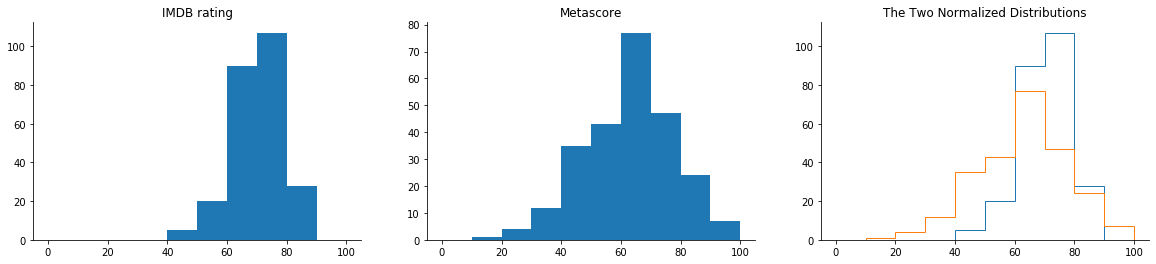

In [32]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20,4))
ax1, ax2, ax3 = fig.axes
ax1.hist(movie_ratings['n_imdb'], bins = 10, range = (0,100))
ax1.set_title('IMDB rating')

ax2.hist(movie_ratings['meta_score'], bins = 10, range = (0,100)) # bin range = 10
ax2.set_title('Metascore')

ax3.hist(movie_ratings['n_imdb'], bins = 10, range = (0,100), histtype = 'step')
ax3.hist(movie_ratings['meta_score'], bins = 10, range = (0,100), histtype = 'step')

ax3.set_title('The Two Normalized Distributions')

for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.show()